In [146]:
using JLD2
using Images
using Plots
using Colors
include("PTRC_RW.jl")
include("HaLRTC.jl")
include("SiLRTC.jl")
include("SiLRTCTT.jl")
include("TMacTT.jl")
cimgs_pass = "../../methods/data/cimg/tensor_SIPI.jld2"
shirk = 2
cimgs = load(cimgs_pass)
img_names = keys(cimgs);

In [147]:
function get_miss_fit(Tgt, T, W)
    Wc = 1 .- W
    rmse = norm(T .* Wc - Tgt .* Wc) / norm(Tgt .* Wc)
    return 1 - round(rmse,digits=2)
end

get_miss_fit (generic function with 1 method)

In [133]:
function draw_pic(cimg;title="",size=[100,100])
    cimg = permutedims( cimg, [3,1,2] )
    draw = colorview(RGB, cimg)
    draw = map(clamp01nan,draw)
    return plot(draw,frame=:none, titlefontsize=8, title=title, size=size)
end

function add_random_missing!(T, missing_ratio;init="rand")
    J = size(T)
    idx_all = CartesianIndices(T)
    n_missing = Int(floor(length(T)*missing_ratio))
    idx_missing = sample(idx_all, n_missing, replace=false)
    W = ones(J)

    mu = ( sum(T) - sum(T[idx_missing]) ) / (prod(J) - n_missing)
    dist = Normal(mu,1)
    for idx in idx_missing
        if init == "rand"
            T[idx] = rand()
        elseif init == "gauss"
            T[idx] = randn() + 0.5
            #T[idx] = rand(dist)
        elseif init == "zero"
            T[idx] = 0.0
        else
            error("init option error")
        end
        W[idx] = 0.0
    end
    return T, W
end

add_random_missing! (generic function with 1 method)

In [134]:
cimg = cimgs["Tree"]
cimg_gt = cimg[begin:shirk:end, begin:shirk:end,:];
cimg_miss, M = add_random_missing!(deepcopy(cimg_gt), 0.8, init="gauss");

In [135]:
reconv_SiLRTCTT = undef
for fv in [0.01,0.05,0.1,0.5,1]
    reconv_SiLRTCTT   = SiLRTCTT!(deepcopy(cimg_miss), M, f=fv, iter_max=500,  verbose=true, verbose_inv=10, tol=1.0e-5, Xgt=cimg_gt);
end

  10   Inf 0.894430 
  20   Inf 0.894430 
  30   Inf 0.894430 
  40   Inf 0.894430 
  50   Inf 0.894430 
  60   Inf 0.894430 
  70   Inf 0.894430 
  80   Inf 0.894430 
  90   Inf 0.894430 
 100   Inf 0.894430 
 110   Inf 0.894430 
 120   Inf 0.894430 
 130   Inf 0.894430 
 140   Inf 0.894430 
 150   Inf 0.894430 
 160   Inf 0.894430 
 170   Inf 0.894430 
 180   Inf 0.894430 
 190   Inf 0.894430 
 200   Inf 0.894430 
 210   Inf 0.894430 
 220   Inf 0.894430 
 230   Inf 0.894430 
 240   Inf 0.894430 
 250   Inf 0.894430 
 260   Inf 0.894430 
 270   Inf 0.894430 
 280   Inf 0.894430 
 290   Inf 0.894430 
 300   Inf 0.894430 
 310   Inf 0.894430 
 320   Inf 0.894430 
 330   Inf 0.894430 
 340   Inf 0.894430 
 350   Inf 0.894430 
 360   Inf 0.894430 
 370   Inf 0.894430 
 380   Inf 0.894430 
 390   Inf 0.894430 
 400   Inf 0.894430 
 410   Inf 0.894430 
 420   Inf 0.894430 
 430   Inf 0.894430 
 440   Inf 0.894430 
 450   Inf 0.894430 
 460   Inf 0.894430 
 470   Inf 0.894430 
 480   Inf 0.

In [148]:
reconv_HaLRTC   = HaLRTC(deepcopy(cimg_miss), M, rho=1.0e-2, verbose_inv=5, tol=1.0e-2);
reconv_SiLRTC   = SiLRTC(deepcopy(cimg_miss), M, tau=1.0e0,  iter_max=200,  verbose=true, verbose_inv=10, tol=1.0e-3);
R = [4,4,3]; alpha = [0.33,0.33,0.33]; d = 2;
reconv_PTRCRW = PTRCRW!(deepcopy(cimg_miss), M, R, alpha, d, verbose=true, tol=1.0e-2, verbose_inval=5);

   5 0.150471   NaN 
  10 0.068505   NaN 
  15 0.048406   NaN 
  20 0.016327   NaN 
  25 0.012195   NaN 
  10 0.044557   NaN 
  20 0.054893   NaN 
  30 0.029349   NaN 
  40 0.009213   NaN 
  50 0.004839   NaN 
  60 0.002675   NaN 
  70 0.001459   NaN 


LoadError: SingularException(12)

In [154]:
R = [5,5]
reconv_TMacTT = TMacTT(deepcopy(cimg_miss), M, R, iter_max=20,  verbose=true, verbose_inv=1, tol=1.0e-3, Xgt=cimg_gt);

(iter, diff_X, rms) = (2, 0.08705853980497617, 0.4471989224768215)
(iter, diff_X, rms) = (3, 0.06100520635377298, 0.4197744499887758)
(iter, diff_X, rms) = (4, 0.0479249569442373, 0.4015255930745854)
(iter, diff_X, rms) = (5, 0.038717993557776866, 0.38908749339588916)
(iter, diff_X, rms) = (6, 0.032226831618103455, 0.3802915910079617)
(iter, diff_X, rms) = (7, 0.027670731168764798, 0.3737037142890602)
(iter, diff_X, rms) = (8, 0.024528368159942728, 0.3683515097502486)
(iter, diff_X, rms) = (9, 0.022434333447976185, 0.3635747696800571)
(iter, diff_X, rms) = (10, 0.02109320502715348, 0.3589508296582986)
(iter, diff_X, rms) = (11, 0.020233284874223323, 0.3542569765909592)
(iter, diff_X, rms) = (12, 0.019607454668022013, 0.3494376277105172)
(iter, diff_X, rms) = (13, 0.019022700476897608, 0.34455668371929243)
(iter, diff_X, rms) = (14, 0.018365391362468914, 0.3397366214012771)
(iter, diff_X, rms) = (15, 0.017600010292692952, 0.335102173933074)
(iter, diff_X, rms) = (16, 0.01674457440674717

In [155]:
fit_PTRCRW = get_miss_fit(cimg_gt, reconv_PTRCRW, M);
fit_HaLRTC = get_miss_fit(cimg_gt, reconv_HaLRTC, M);
fit_SiLRTC = get_miss_fit(cimg_gt, reconv_SiLRTC, M);
fit_SiLRTCTT = get_miss_fit(cimg_gt, reconv_SiLRTCTT, M);
fit_TMacTT = get_miss_fit(cimg_gt, reconv_TMacTT, M);

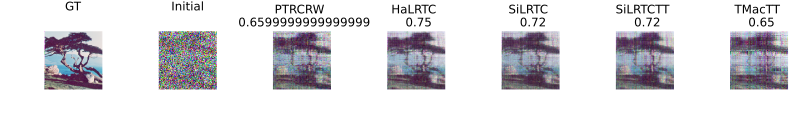

In [156]:
pgt   = draw_pic(cimg_gt,     title="GT");
pinit = draw_pic(cimg_miss,   title="Initial");
p1  = draw_pic(reconv_PTRCRW, title="PTRCRW \n $fit_PTRCRW");
p2  = draw_pic(reconv_HaLRTC, title="HaLRTC \n $fit_HaLRTC");
p3  = draw_pic(reconv_SiLRTC, title="SiLRTC \n $fit_SiLRTC");
p4  = draw_pic(reconv_SiLRTCTT, title="SiLRTCTT \n $fit_SiLRTCTT");
p5  = draw_pic(reconv_TMacTT, title="TMacTT \n $fit_TMacTT");
plot(pgt, pinit, p1, p2, p3, p4, p5, layout=(1,7), size=(800,120))